In [106]:
import benford as bl
import pandas as pd
import numpy as np

In [118]:
df = pd.read_excel('fraudulent 38.xlsx',converters={'Global Company Key':str})

In [108]:
import benford as bf

In [109]:
df.head()

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,ISO Currency Code,Assets - Total,Active/Inactive Status Marker,GIC Industries
0,030477,2010-09-30 00:00:00,2010,INDL,C,D,STD,MATW,USD,993.825,A,202010
1,030477,2011-09-30 00:00:00,2011,INDL,C,D,STD,MATW,USD,1097.455,A,202010
2,030477,2012-09-30 00:00:00,2012,INDL,C,D,STD,MATW,USD,1128.042,A,202010
3,030477,2013-09-30 00:00:00,2013,INDL,C,D,STD,MATW,USD,1214.927,A,202010
4,030477,2014-09-30 00:00:00,2014,INDL,C,D,STD,MATW,USD,2024.048,A,202010


In [119]:
df[df['Global Company Key'].isin(['030477'])]['Assets - Total'].astype('float')

0     993.825
1    1097.455
2    1128.042
3    1214.927
4    2024.048
Name: Assets - Total, dtype: float64

In [120]:
def benford(feat):
    X=df[df['Global Company Key'].isin([feat])]['Assets - Total'].astype('float')
    #print(X)
    fld = bf.first_digits(X, sign='all', digs=1, MAD=True, chi_square=True, KS=True, verbose=False, confidence=95, show_plot=False)
    chi = list(bf.chi_sq(fld,ddf=8,confidence=95))
    ks = list(bf.kolmogorov_smirnov(fld, confidence=95, N=len(X)))
    mad = float(bf.mad(X,test=1))
    print(mad)
    chi_st = chi[0]
    chi_ci = chi[1]
    ks_st = ks[0]
    ks_ci = ks[1]
    if chi_st < chi_ci:
        chi_status = "Pass"
    else:
        chi_status ='Fail'
    
    if ks_st < ks_ci:
        ks_status = "Pass"
    else:
        ks_status = "Fail"
    if 0.0000 <= mad < 0.0012:
        mad_status = "Close Conformity"
    elif 0.0012 <= mad < 0.0018:
        mad_status = "Acceptable Conformity"
    elif 0.0018 <= mad <= 0.0022:
        mad_status = "Marginally Acceptable Conformity"
    elif mad > 0.0022:
        mad_status = "Non Conformity"

    return chi_status, ks_status, mad_status

In [121]:
df_u = pd.DataFrame(df['Global Company Key'].unique(), columns=['Global Company Key'])
df_u['chi_status']=np.NaN
df_u['ks_status']=np.NaN
df_u['mad_status']=np.NaN


for x,i in enumerate(df_u['Global Company Key']):
    chi, ks, mad = benford(i)
    df_u.loc[x,'chi_status']=chi
    df_u.loc[x,'ks_status']=ks
    df_u.loc[x,'mad_status']=mad


C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:798: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.KS = kolmogorov_smirnov(df, confidence=confidence, N=len(temp),
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.


The Chi-square statistic is 6.4861.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.3229.
Critical K-S for this series: 0.6073
0.10602694549325833

The Chi-square statistic is 4.8414.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.3979.
Critical K-S for this series: 0.9603
0.1553266676302264

The Chi-square statistic is 21.1261.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.6990.
Critical K-S for this series: 0.6073
0.18974932540483602

The Chi-square statistic is 2.3219.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.6990.
Critical K-S for this series: 1.3580
0.1553266676302264

The Chi-square statistic is 7.8795.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.5229.
Critical K-S for this series: 0.6073
0.11619527672896392

The Chi-square statistic is 14.5982.
Critical Chi-square for this series: 15.507

C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:798: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.KS = kolmogorov_smirnov(df, confidence=confidence, N=len(temp),
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.


The Chi-square statistic is 38.9121.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.7031.
Critical K-S for this series: 0.6073
0.15624221933154303

The Chi-square statistic is 46.5170.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.6990.
Critical K-S for this series: 0.6790
0.2046263897671945

The Chi-square statistic is 2.3219.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.6990.
Critical K-S for this series: 1.3580
0.1553266676302264

The Chi-square statistic is 4.6439.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.6990.
Critical K-S for this series: 0.9603
0.1553266676302264

The Chi-square statistic is 9.5649.
Critical Chi-square for this series: 15.507.

The Kolmogorov-Smirnov statistic is 0.3979.
Critical K-S for this series: 0.7840
0.1553266676302264

The Chi-square statistic is 19.9771.
Critical Chi-square for this series: 15.507.

C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:798: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.KS = kolmogorov_smirnov(df, confidence=confidence, N=len(temp),
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.py:793: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.chi_square = chi_sq(df, ddf=len(df) - 1,
C:\Users\F14EIYF\AppData\Roaming\Python\Python310\site-packages\benford\benford.

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df_u.head()

,Global Company Key,chi_status,ks_status,mad_status
0,030477,Pass,Pass,Non Conformity
1,006268,Pass,Pass,Non Conformity
2,184378,Fail,Fail,Non Conformity
3,114959,Pass,Pass,Non Conformity
4,200976,Pass,Pass,Non Conformity


<AxesSubplot:xlabel='chi_status', ylabel='count'>

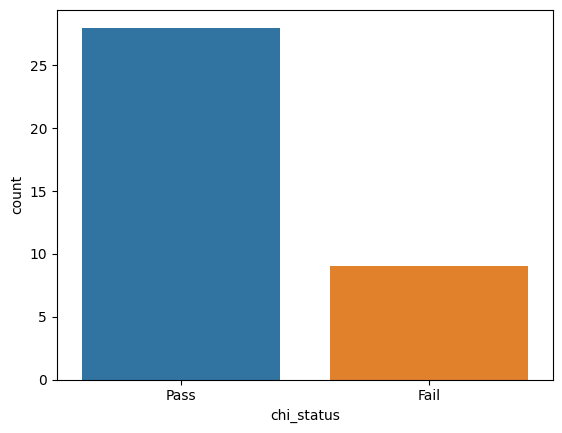

In [130]:
sns.countplot(data=df_u, x='chi_status')

<AxesSubplot:xlabel='ks_status', ylabel='count'>

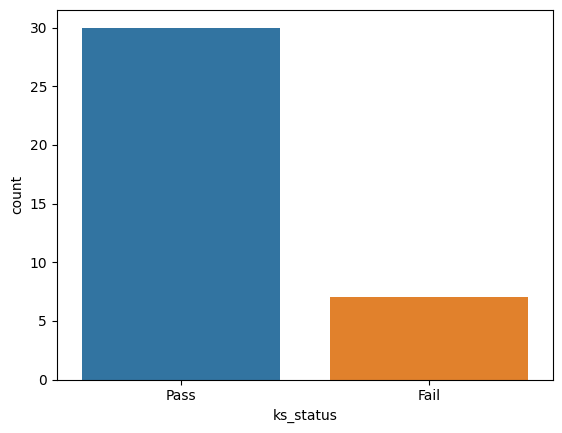

In [131]:
sns.countplot(data=df_u, x='ks_status')

<AxesSubplot:xlabel='mad_status', ylabel='count'>

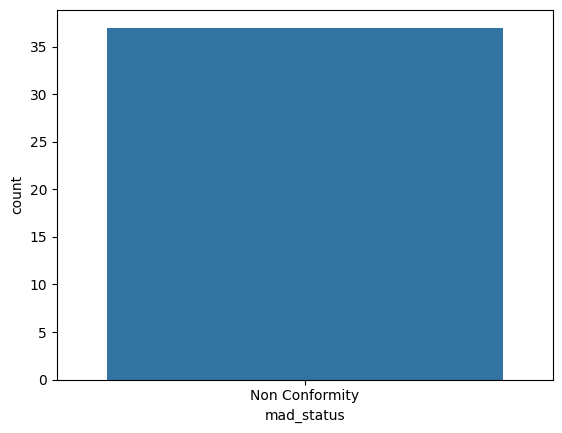

In [132]:
sns.countplot(data=df_u, x='mad_status')